In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import imageio
import os
import json
from IPython.display import Image

In [26]:
class AmtSkon:
    def __init__(self, zb_stnw, alfbt, fun_prz, stn_p, zb_stnw_ak : list):
        self.zb_stnw = zb_stnw
        self.alfbt = alfbt
        self.fun_prz = fun_prz
        self.stn_p = stn_p
        self.zb_stnw_ak = zb_stnw_ak
    
    def start(self, slowo):
        stan_aktualny = self.stn_p
        sciezka = [stan_aktualny]
        
        for znak in slowo:
            
            if znak not in self.alfbt:
                raise ValueError(f"Nieznany symbol: {znak}")
            
            stan_aktualny = self.fun_prz.get((stan_aktualny, znak))
            
            if stan_aktualny is None:
                return False
            
            sciezka.append(stan_aktualny)
        
        return stan_aktualny in self.zb_stnw_ak, sciezka
    
    def simulate(self, sciezka, filename = 'simulation.gif', save_to_file = False):
        G = nx.MultiDiGraph()
        edge_labels = {}
        
        
        
        for (stan, znak), nowy_stan in self.fun_prz.items():
            G.add_edge(stan, nowy_stan)
            edge_labels.setdefault((stan, nowy_stan), set()).add(znak)
        
        
        
        edge_labels = {k: "".join(sorted(v)) for k, v in edge_labels.items()}
                
        pos = nx.kamada_kawai_layout(G)
        
        
        
        frames = []
        temp_dir = "temp_frames"
        os.makedirs(temp_dir, exist_ok=True)
        
        for i, stan in enumerate(sciezka):
            plt.figure(figsize=(12, 8))
            node_colors = ["red" if n == stan else "grey" for n in G.nodes]
            
            nx.draw(G, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=12, edge_color='gray', connectionstyle='arc3,rad=0.1')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.35)        
            
            frame_path = os.path.join(temp_dir, f"frame_{i}.png")
            
            plt.savefig(frame_path)
            plt.close()
            frames.append(frame_path)
        
        images = [imageio.imread(frame) for frame in frames]
        if save_to_file: 
            imageio.mimsave(filename, images, duration=1.8)
            display(Image(filename="simulation.gif"))
            
        for frame in frames:
            os.remove(frame)
        os.rmdir(temp_dir)
        
        

# Zadanie 1

Napisz program symulujący działanie automatu skończonego opisanego jak następuje. Symulujący, czyli
pokazujący konfigurację automatu w kolejnych krokach. Umożliw podanie dowolnego wejścia (zgodnego z
alfabetem).

In [27]:
Q = ['q0','q1','q2','q3']
sigma = ['0','1']
qp = 'q0'
F = ['q3']

delta = {
('q0', '0'): 'q1',
('q0', '1'): 'q0',
('q1', '0'): 'q3',
('q1', '1'): 'q2',
('q2', '0'): 'q2',
('q2', '1'): 'q0',
('q3', '0'): 'q2',
('q3', '1'): 'q2'
}

w1 = '001100'
w2 = '010100'
w3 = '10110'

machine = AmtSkon(Q, sigma, delta, qp, F)

for w in [w1, w2, w3]:
    print(machine.start(w))

(True, ['q0', 'q1', 'q3', 'q2', 'q0', 'q1', 'q3'])
(True, ['q0', 'q1', 'q2', 'q2', 'q0', 'q1', 'q3'])
(False, ['q0', 'q0', 'q1', 'q2', 'q0', 'q1'])


# Zadanie 2

Napisz program symulujący działanie automatu skończonego o grafie przejść jak na Rys. 1 (zbiór stanów i
alfabet są takie, jakie wynikają z grafu). Symulację dla zadanego ciągu wejściowego przedstaw na rozrysowanym
grafie.

/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_43069/1451747215.py:62: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(frame) for frame in frames]


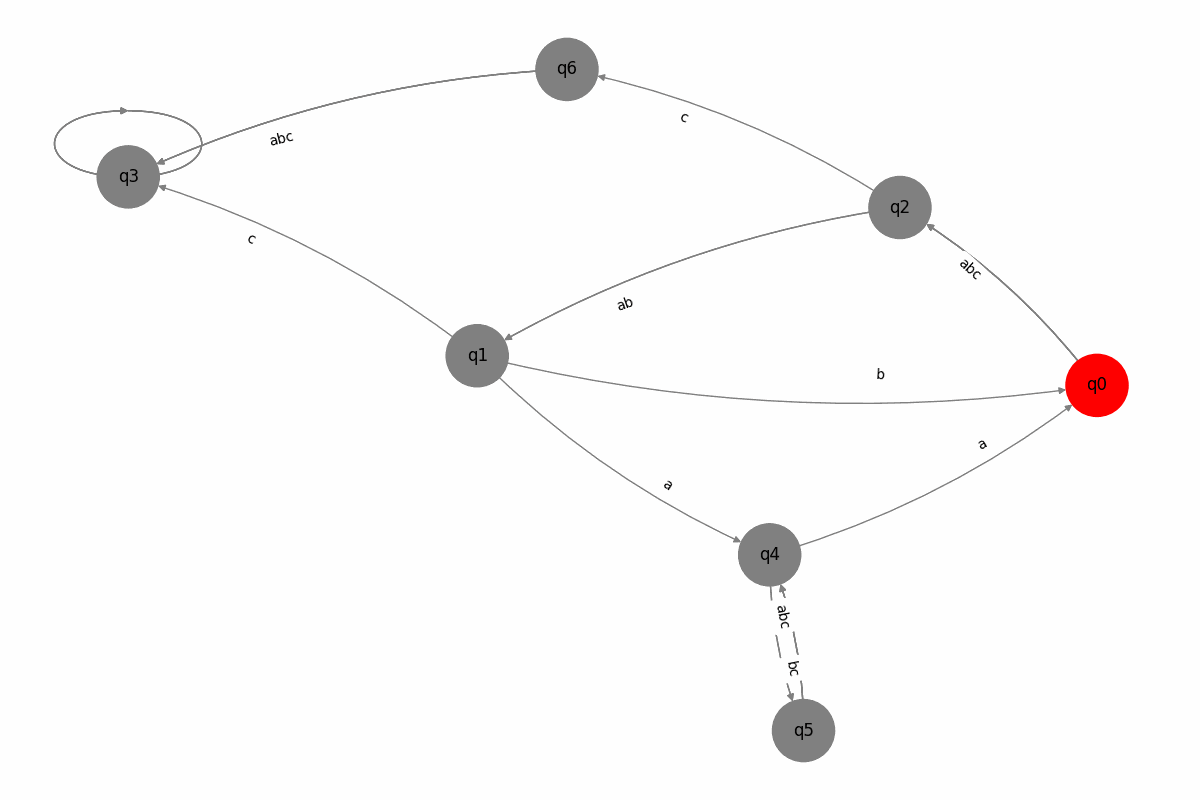

In [32]:
zb_stnw = {'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6'}
alfbt = {'a', 'b', 'c'}
fun_prz = {
    ('q0', 'b'): 'q2',
    ('q0', 'a'): 'q2',
    ('q0', 'c'): 'q2',
    ('q1', 'a'): 'q4',
    ('q1', 'b'): 'q0',
    ('q1', 'c'): 'q3',
    ('q2', 'a'): 'q1',
    ('q2', 'b'): 'q1',
    ('q2', 'c'): 'q6',
    ('q3', 'a'): 'q3',
    ('q3', 'b'): 'q3',
    ('q3', 'c'): 'q3',
    ('q4', 'a'): 'q0',
    ('q4', 'b'): 'q5',
    ('q4', 'c'): 'q5',
    ('q5', 'a'): 'q4',
    ('q5', 'b'): 'q4',
    ('q5', 'c'): 'q4',
    ('q6', 'a'): 'q3',
    ('q6', 'b'): 'q3',
    ('q6', 'c'): 'q3'
}
stn_p = 'q0'
zb_stnw_ak = {'q4', 'q5'}

automat = AmtSkon(zb_stnw, alfbt, fun_prz, stn_p, zb_stnw_ak)

wejscie = "cba"
wynik, sciezka = automat.start(wejscie)
automat.simulate(sciezka,save_to_file=True)

# Zadanie 3

Napisz program (niekoniecznie automat skończony) rozpoznający język A = {auaw : u,w ∈ {0, 1}*}.

In [29]:
Q = ['q0','q1','q2','q3','q4','q5']
sigma = ['a','0','1']
qp = 'q0'
F = ['q5']

A = {
('q0', '0'): 'q1',
('q0', '1'): 'q1',
('q0', 'a'): 'q2',

('q1', '0'): 'q1',
('q1', '1'): 'q1',
('q1', 'a'): 'q1',

('q2', '0'): 'q3',
('q2', '1'): 'q3',
('q2', 'a'): 'q1',

('q3', '0'): 'q3',
('q3', '1'): 'q3',
('q3', 'a'): 'q4',

('q4', '0'): 'q5',
('q4', '1'): 'q5',
('q4', 'a'): 'q1',

('q5', '0'): 'q5',
('q5', '1'): 'q5',
('q5', 'a'): 'q1',
}

w1 = 'aa1'
w2 = 'a011a10'
w3 = 'a0110'
w4 = '10011'

machine = AmtSkon(Q, sigma, A, qp, F)

for w in [w1, w2, w3, w4]:
    ans, steps = machine.start(w)
    if ans: print('Język rozpoznany')
    else: print('Język nie rozpoznany')

Język nie rozpoznany
Język rozpoznany
Język nie rozpoznany
Język nie rozpoznany


# Zadanie 4

Napisz program symulujący automat rozpoznający język B = {a*n* bcd*m* : n ≥ 0,m ≥ 0}. Przedstaw symulację
dla zadanego ciągu wejściowego.

In [ ]:
Q = ['q0','q1','q2','q3']
sigma = ['a','b','c','d']
qp = 'q0'
F = ['q3']

B = {
('q0', 'a'): 'q0',
('q0', 'b'): 'q2',
('q0', 'c'): 'q1',
('q0', 'd'): 'q1',

('q1', 'a'): 'q1',
('q1', 'b'): 'q1',
('q1', 'c'): 'q1',
('q1', 'd'): 'q1',

('q2', 'a'): 'q1',
('q2', 'b'): 'q1',
('q2', 'c'): 'q3',
('q2', 'd'): 'q1',

('q3', 'a'): 'q1',
('q3', 'b'): 'q1',
('q3', 'c'): 'q1',
('q3', 'd'): 'q3'
}

w1 = 'bc'
w2 = 'aabcddd'
w3 = 'dddbcaa'


machine = AmtSkon(Q, sigma, B, qp, F)

for w in [w1, w2, w3]:
    ans, steps = machine.start(w)
    if ans: print('Język rozpoznany')
    else: print('Język nie rozpoznany')

Język rozpoznany True
Język rozpoznany True
Język nie rozpoznany False


# Zadanie 5
Napisz program symulujący dowolny automat skończony zadany przez użytkownika (w pliku; zaproponuj
format pliku). Ogranicz się do alfabetów złożonych z dowolnego podzbioru abecadła (pomijając litery diakrytyzowane).
Symuluj działanie automatu krok po kroku.

### Opis rozwiazania

plik znajduje się w formacie json i używa oznaczeń wymaganych w tej liście (zb_stnw, alfbt, fun_prz, stn_p, zb_stnw_ak). Wszystkie te parametry zostaja wczytane przez funkcję, a następnie dla każdego wejścia, wyświetlane sa wyniki.

In [31]:
def create_automat(nazwa_pliku):

    def read_automat(nazwa_pliku):
        with open(nazwa_pliku, 'r') as plik:
            dane = json.load(plik)
        
        zb_stnw = set(dane["zb_stnw"])
        alfbt = set(dane["alfbt"])
        fun_prz = {(klucz.split(",")[0], klucz.split(",")[1]): wartosc for klucz, wartosc in dane["fun_prz"].items()}
        stn_p = dane["stn_p"]
        zb_stnw_ak = set(dane["zb_stnw_ak"])

        return zb_stnw, alfbt, fun_prz, stn_p, zb_stnw_ak

    return AmtSkon(*read_automat(nazwa_pliku))


# machine = create_automat("automat.json")
wejscie = "aaabcdddddd"
# wynik, sciezka = machine.start(wejscie)

# machine.simulate(sciezka, save_to_file=True)